# First Glance of National China Animal Production

### Read Data and Merge Data Frame

In [1]:
import numpy as np
import pandas as pd

class ReadData():
    """
    import pandas at first
    Usage:
    df = ReadData(file_name, url).createDF() 
    """
    def __init__(self, file_name, 
                 url = None,
                 org_name = 'good-food', 
                 repo_name = 'datamap2019', 
                 folder_path = '/data/', 
                 mode = 'wb'
                ):
        
        self.file_name = file_name
        self.org_name = org_name
        self.repo_name = repo_name
        self.folder_path = folder_path
        
        self.url = url
        self.mode = mode
        
        self.root_path = 'https://github.com/'
        self.raw_path = 'https://raw.githubusercontent.com/'
        self.branch = 'master'

    def getPath(self):
        if self.url == None:
            path = self.root_path + self.org_name + '/' + self.repo_name + '/blob/' + self.branch + self.folder_path + self.file_name
            raw_path = self.raw_path + self.org_name + '/' + self.repo_name + '/' + self.branch + self.folder_path + self.file_name
            print('Url: ', path)
            print('Raw data:', raw_path)
        else:
            print('Url: ', self.url)
            print('Raw data:', self.url)
        return raw_path

    def curl(self):
        import urllib.request, urllib.parse, urllib.error
        
        url = self.getPath()
        response = urllib.request.urlopen(url).read()
        with open(self.file_name, self.mode) as file_handle:
            file_handle.write(response)

    def delFile(self):
        import os
        if os.path.exists(self.file_name): os.remove(self.file_name)
        else: print('no such file:%s'%self.file_name)

    def createDF(self):
        import time
        print(self.file_name, 'is under dealing... needs 1 min')
        self.curl()
        time.sleep(10)
        df = pd.read_csv(self.file_name)
        self.delFile()
        return df

In [2]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [3]:
# input
item = 'product_livestock_cn'

# output
data_stock = item + '_stock.csv'
data_primary = item + '_primary.csv'

In [4]:
# If you haven't cloned the whole repository from 
# [Github](https://github.com/good-food/datamap2019)
# please uncomment and run the top 2 lines 
# or else, run the bottom 2 lines or clone the reporsitory at first.
# ------------------------------------------------------------------

# df_stock = ReadData(data_stock).createDF()
# df_primary = ReadData(data_primary).createDF()

df_stock = pd.read_csv('./data/'+data_stock)
df_primary = pd.read_csv('./data/'+data_primary)

In [5]:
df_prod = pd.concat([df_stock, df_primary], axis=0,join='outer')
print('shape of df_stock.shape is {}\nshape of df_primary.shape is {}\nshape of df_prod.shape is {}'.format(df_stock.shape, df_primary.shape, df_prod.shape))

shape of df_stock.shape is (1368, 14)
shape of df_primary.shape is (7090, 14)
shape of df_prod.shape is (8458, 14)


In [6]:
df_prod.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QA,Live Animals,351,China,5111,Stocks,1171,Animals live nes,1961,1961,Head,415450.0,A,"Aggregate, may include official, semi-official, estimated or calculated data"
1,QA,Live Animals,351,China,5111,Stocks,1171,Animals live nes,1962,1962,Head,587400.0,A,"Aggregate, may include official, semi-official, estimated or calculated data"
2,QA,Live Animals,351,China,5111,Stocks,1171,Animals live nes,1963,1963,Head,587665.0,A,"Aggregate, may include official, semi-official, estimated or calculated data"
3,QA,Live Animals,351,China,5111,Stocks,1171,Animals live nes,1964,1964,Head,510730.0,A,"Aggregate, may include official, semi-official, estimated or calculated data"
4,QA,Live Animals,351,China,5111,Stocks,1171,Animals live nes,1965,1965,Head,255065.0,A,"Aggregate, may include official, semi-official, estimated or calculated data"


In [7]:
df_prod.drop(columns = ['Domain Code', 'Area Code', 'Element Code', 'Item Code', 'Year Code', 'Flag'], inplace=True)
df_prod.head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
0,Live Animals,China,Stocks,Animals live nes,1961,Head,415450.0,"Aggregate, may include official, semi-official, estimated or calculated data"
1,Live Animals,China,Stocks,Animals live nes,1962,Head,587400.0,"Aggregate, may include official, semi-official, estimated or calculated data"
2,Live Animals,China,Stocks,Animals live nes,1963,Head,587665.0,"Aggregate, may include official, semi-official, estimated or calculated data"
3,Live Animals,China,Stocks,Animals live nes,1964,Head,510730.0,"Aggregate, may include official, semi-official, estimated or calculated data"
4,Live Animals,China,Stocks,Animals live nes,1965,Head,255065.0,"Aggregate, may include official, semi-official, estimated or calculated data"


In [8]:
df = df_prod.dropna()
df.describe(include='all')

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
count,7919,7919,7919,7919,7919.000000,7919,7.919000e+03,7919
unique,2,1,8,66,NaN,9,NaN,2
top,Livestock Primary,China,Production,"Meat, buffalo",NaN,tonnes,NaN,"Aggregate, may include official, semi-official, estimated or calculated data"
freq,6951,7919,3337,171,NaN,2457,NaN,5742
mean,NaN,NaN,NaN,NaN,1988.465084,NaN,1.513920e+07,NaN
std,NaN,NaN,NaN,NaN,16.057723,NaN,6.255401e+07,NaN
min,NaN,NaN,NaN,NaN,1961.000000,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,1975.000000,NaN,7.500000e+03,NaN
50%,NaN,NaN,NaN,NaN,1989.000000,NaN,1.446840e+05,NaN
75%,NaN,NaN,NaN,NaN,2002.000000,NaN,2.002374e+06,NaN


### Select Elements and Items that Have Complete Records

In [9]:
df.groupby('Element').count()

,Domain,Area,Item,Year,Unit,Value,Flag Description
Element,,,,,,,
Laying,57,57,57,57,57,57,57
Milk Animals,285,285,285,285,285,285,285
Prod Popultn,57,57,57,57,57,57,57
Producing Animals/Slaughtered,1038,1038,1038,1038,1038,1038,1038
Production,3337,3337,3337,3337,3337,3337,3337
Stocks,968,968,968,968,968,968,968
Yield,611,611,611,611,611,611,611
Yield/Carcass Weight,1566,1566,1566,1566,1566,1566,1566


In [10]:
df.groupby('Item').count()

,Domain,Area,Element,Year,Unit,Value,Flag Description
Item,,,,,,,
Animals live nes,56,56,56,56,56,56,56
Asses,57,57,57,57,57,57,57
Beehives,57,57,57,57,57,57,57
Buffaloes,57,57,57,57,57,57,57
Camels,57,57,57,57,57,57,57
Cattle,57,57,57,57,57,57,57
Chickens,57,57,57,57,57,57,57
Ducks,57,57,57,57,57,57,57
"Eggs, hen, in shell",171,171,171,171,171,171,171


In [11]:
df = df.loc[df['Element'].isin(['Stocks', 'Producing Animals/Slaughtered', 'Production', 'Yield/Carcass Weight'])]
df.head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
0,Live Animals,China,Stocks,Animals live nes,1961,Head,415450.0,"Aggregate, may include official, semi-official, estimated or calculated data"
1,Live Animals,China,Stocks,Animals live nes,1962,Head,587400.0,"Aggregate, may include official, semi-official, estimated or calculated data"
2,Live Animals,China,Stocks,Animals live nes,1963,Head,587665.0,"Aggregate, may include official, semi-official, estimated or calculated data"
3,Live Animals,China,Stocks,Animals live nes,1964,Head,510730.0,"Aggregate, may include official, semi-official, estimated or calculated data"
4,Live Animals,China,Stocks,Animals live nes,1965,Head,255065.0,"Aggregate, may include official, semi-official, estimated or calculated data"


In [51]:
large_st=['Cattle', 'Camels', 'Horses']
mid_st=['Pigs', 'Goats', 'Sheep']
bird_st=['Chickens', 'Ducks', 'Geese and guinea fowls']

large_mt=['Meat, cattle', 'Meat, camel', 'Meat, horse']
mid_mt=['Meat, pig', 'Meat, goat', 'Meat, sheep']
bird_mt=['Meat, chicken', 'Meat, duck', 'Meat, goose and guinea fowl']

egg=['Eggs, hen, in shell', 'Eggs, other bird, in shell']
milk=['Milk, whole fresh cow','Milk, whole fresh camel','Milk, whole fresh goat','Milk, whole fresh sheep']

df = df.loc[df['Item'].isin(large_st+mid_st+bird_st + large_mt+mid_mt+bird_mt + egg+milk)]
df.shape

(2394, 8)

In [13]:
df.groupby(['Element', 'Item']).count()

Domain  Area  Year  \
Element                       Item                                              
Producing Animals/Slaughtered Meat, camel                      57    57    57   
                              Meat, cattle                     57    57    57   
                              Meat, chicken                    57    57    57   
                              Meat, duck                       57    57    57   
                              Meat, goat                       57    57    57   
                              Meat, goose and guinea fowl      57    57    57   
                              Meat, horse                      57    57    57   
                              Meat, pig                        57    57    57   
                              Meat, sheep                      57    57    57   
Production                    Eggs, hen, in shell              57    57    57   
                              Eggs, other bird, in shell       57    57    57   
                              Meat, camel                      57    57    57   
                              Meat, cattle                     57    57    57   
                              Meat, chicken                    57    57    57   
                              Meat, duck                       57    57    57   
                              Meat, goat                       57    57    57   
                              Meat, goose and guinea fowl      57    57    57   
                              Meat, horse                      57    57    57   
                              Meat, pig                        57    57    57   
                              Meat, sheep                      57    57    57   
                              Milk, whole fresh camel          57    57    57   
                              Milk, whole fresh cow            57    57    57   
                              Milk, whole fresh goat           57    57    57   
                              Milk, whole fresh sheep          57    57    57   
Stocks                        Camels                           57    57    57   
                              Cattle                           57    57    57   
                              Chickens                         57    57    57   
                              Ducks                            57    57    57   
                              Geese and guinea fowls           57    57    57   
                              Goats                            57    57    57   
                              Horses                           57    57    57   
                              Mules                            57    57    57   
                              Pigs                             57    57    57   
                              Sheep                            57    57    57   
Yield/Carcass Weight          Meat, camel                      57    57    57   
                              Meat, cattle                     57    57    57   
                              Meat, chicken                    57    57    57   
                              Meat, duck                       57    57    57   
                              Meat, goat                       57    57    57   
                              Meat, goose and guinea fowl      57    57    57   
                              Meat, horse                      57    57    57   
                              Meat, pig                        57    57    57   
                              Meat, sheep                      57    57    57   

                                                           Unit  Value  \
Element                       Item                                       
Producing Animals/Slaughtered Meat, camel                    57     57   
                              Meat, cattle                   57     57   
                              Meat, chicken                  57     57   
                              Meat, duck   

In [69]:
df.groupby(['Element', 'Unit']).count()

Domain  Area  Item  Year  Value  \
Element                       Unit                                            
Producing Animals/Slaughtered 10000 Head       513   513   513   513    513   
Production                    10000 tonnes     855   855   855   855    855   
Stocks                        10000 Head       513   513   513   513    513   
Yield/Carcass Weight          g/An             171   171   171   171    171   
                              kg/An            342   342   342   342    342   

                                            Flag Description  
Element                       Unit                            
Producing Animals/Slaughtered 10000 Head                 513  
Production                    10000 tonnes               855  
Stocks                        10000 Head                 513  
Yield/Carcass Weight          g/An                       171  
                              kg/An                      342

In [14]:
df['Unit'].unique()

array(['Head', '1000 Head', 'tonnes', 'hg/An', '0.1g/An'], dtype=object)

In [15]:
df.loc[df['Unit']=='Head'].head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
285,Live Animals,China,Stocks,Camels,1961,Head,381000.0,"Aggregate, may include official, semi-official, estimated or calculated data"
286,Live Animals,China,Stocks,Camels,1962,Head,378000.0,"Aggregate, may include official, semi-official, estimated or calculated data"
287,Live Animals,China,Stocks,Camels,1963,Head,386000.0,"Aggregate, may include official, semi-official, estimated or calculated data"
288,Live Animals,China,Stocks,Camels,1964,Head,402000.0,"Aggregate, may include official, semi-official, estimated or calculated data"
289,Live Animals,China,Stocks,Camels,1965,Head,425000.0,"Aggregate, may include official, semi-official, estimated or calculated data"


In [16]:
df.loc[df['Unit']=='1000 Head'].head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
456,Live Animals,China,Stocks,Chickens,1961,1000 Head,540850.0,"Aggregate, may include official, semi-official, estimated or calculated data"
457,Live Animals,China,Stocks,Chickens,1962,1000 Head,554423.0,"Aggregate, may include official, semi-official, estimated or calculated data"
458,Live Animals,China,Stocks,Chickens,1963,1000 Head,570972.0,"Aggregate, may include official, semi-official, estimated or calculated data"
459,Live Animals,China,Stocks,Chickens,1964,1000 Head,586801.0,"Aggregate, may include official, semi-official, estimated or calculated data"
460,Live Animals,China,Stocks,Chickens,1965,1000 Head,590895.0,"Aggregate, may include official, semi-official, estimated or calculated data"


In [17]:
df.loc[df['Unit']=='tonnes'].head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
114,Livestock Primary,China,Production,"Eggs, hen, in shell",1961,tonnes,1211565.0,"Aggregate, may include official, semi-official, estimated or calculated data"
115,Livestock Primary,China,Production,"Eggs, hen, in shell",1962,tonnes,1229591.0,"Aggregate, may include official, semi-official, estimated or calculated data"
116,Livestock Primary,China,Production,"Eggs, hen, in shell",1963,tonnes,1247638.0,"Aggregate, may include official, semi-official, estimated or calculated data"
117,Livestock Primary,China,Production,"Eggs, hen, in shell",1964,tonnes,1282830.0,"Aggregate, may include official, semi-official, estimated or calculated data"
118,Livestock Primary,China,Production,"Eggs, hen, in shell",1965,tonnes,1313836.0,"Aggregate, may include official, semi-official, estimated or calculated data"


In [18]:
df.loc[df['Unit']=='hg/An'].head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
3649,Livestock Primary,China,Yield/Carcass Weight,"Meat, camel",1961,hg/An,2200.0,Calculated data
3650,Livestock Primary,China,Yield/Carcass Weight,"Meat, camel",1962,hg/An,2200.0,Calculated data
3651,Livestock Primary,China,Yield/Carcass Weight,"Meat, camel",1963,hg/An,2200.0,Calculated data
3652,Livestock Primary,China,Yield/Carcass Weight,"Meat, camel",1964,hg/An,2200.0,Calculated data
3653,Livestock Primary,China,Yield/Carcass Weight,"Meat, camel",1965,hg/An,2200.0,Calculated data


In [19]:
df.loc[df['Unit']=='0.1g/An'].head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
3991,Livestock Primary,China,Yield/Carcass Weight,"Meat, chicken",1961,0.1g/An,10144.0,Calculated data
3992,Livestock Primary,China,Yield/Carcass Weight,"Meat, chicken",1962,0.1g/An,10141.0,Calculated data
3993,Livestock Primary,China,Yield/Carcass Weight,"Meat, chicken",1963,0.1g/An,10144.0,Calculated data
3994,Livestock Primary,China,Yield/Carcass Weight,"Meat, chicken",1964,0.1g/An,10146.0,Calculated data
3995,Livestock Primary,China,Yield/Carcass Weight,"Meat, chicken",1965,0.1g/An,10149.0,Calculated data


In [20]:
df.loc[df['Unit'] =='Head','Value']=df['Value']/10000
df.loc[df['Unit']=='Head', 'Unit']= '10000 Head'

df.loc[df['Unit'] =='1000 Head','Value']=df['Value']/10
df.loc[df['Unit']=='1000 Head', 'Unit']= '10000 Head'

df.loc[df['Unit'] =='tonnes','Value']=df['Value']/10000
df.loc[df['Unit']=='tonnes', 'Unit']= '10000 tonnes'

df.loc[df['Unit'] =='hg/An','Value']=df['Value']/10
df.loc[df['Unit']=='hg/An', 'Unit']= 'kg/An'

df.loc[df['Unit'] =='0.1g/An','Value']=df['Value']/10
df.loc[df['Unit']=='0.1g/An', 'Unit']= 'g/An'

In [21]:
df['Unit'].unique()

array(['10000 Head', '10000 tonnes', 'kg/An', 'g/An'], dtype=object)

In [22]:
df.loc[df['Unit']=='10000 Head'].head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
285,Live Animals,China,Stocks,Camels,1961,10000 Head,38.1,"Aggregate, may include official, semi-official, estimated or calculated data"
286,Live Animals,China,Stocks,Camels,1962,10000 Head,37.8,"Aggregate, may include official, semi-official, estimated or calculated data"
287,Live Animals,China,Stocks,Camels,1963,10000 Head,38.6,"Aggregate, may include official, semi-official, estimated or calculated data"
288,Live Animals,China,Stocks,Camels,1964,10000 Head,40.2,"Aggregate, may include official, semi-official, estimated or calculated data"
289,Live Animals,China,Stocks,Camels,1965,10000 Head,42.5,"Aggregate, may include official, semi-official, estimated or calculated data"


In [23]:
df.loc[df['Unit']=='10000 tonnes'].head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
114,Livestock Primary,China,Production,"Eggs, hen, in shell",1961,10000 tonnes,121.1565,"Aggregate, may include official, semi-official, estimated or calculated data"
115,Livestock Primary,China,Production,"Eggs, hen, in shell",1962,10000 tonnes,122.9591,"Aggregate, may include official, semi-official, estimated or calculated data"
116,Livestock Primary,China,Production,"Eggs, hen, in shell",1963,10000 tonnes,124.7638,"Aggregate, may include official, semi-official, estimated or calculated data"
117,Livestock Primary,China,Production,"Eggs, hen, in shell",1964,10000 tonnes,128.2830,"Aggregate, may include official, semi-official, estimated or calculated data"
118,Livestock Primary,China,Production,"Eggs, hen, in shell",1965,10000 tonnes,131.3836,"Aggregate, may include official, semi-official, estimated or calculated data"


In [24]:
df.loc[df['Unit']=='kg/An'].head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
3649,Livestock Primary,China,Yield/Carcass Weight,"Meat, camel",1961,kg/An,220.0,Calculated data
3650,Livestock Primary,China,Yield/Carcass Weight,"Meat, camel",1962,kg/An,220.0,Calculated data
3651,Livestock Primary,China,Yield/Carcass Weight,"Meat, camel",1963,kg/An,220.0,Calculated data
3652,Livestock Primary,China,Yield/Carcass Weight,"Meat, camel",1964,kg/An,220.0,Calculated data
3653,Livestock Primary,China,Yield/Carcass Weight,"Meat, camel",1965,kg/An,220.0,Calculated data


In [25]:
df.loc[df['Unit']=='g/An'].head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
3991,Livestock Primary,China,Yield/Carcass Weight,"Meat, chicken",1961,g/An,1014.4,Calculated data
3992,Livestock Primary,China,Yield/Carcass Weight,"Meat, chicken",1962,g/An,1014.1,Calculated data
3993,Livestock Primary,China,Yield/Carcass Weight,"Meat, chicken",1963,g/An,1014.4,Calculated data
3994,Livestock Primary,China,Yield/Carcass Weight,"Meat, chicken",1964,g/An,1014.6,Calculated data
3995,Livestock Primary,China,Yield/Carcass Weight,"Meat, chicken",1965,g/An,1014.9,Calculated data


In [26]:
df.shape

(2451, 8)

In [27]:
df.to_csv('./data/product_livestock_cn_clean.csv', index=False)

## Explore Data Outline

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import datetime
year_now = datetime.date.today().year

In [53]:
df = pd.read_csv('./data/product_livestock_cn_clean.csv')

In [54]:
# set legends
def setLeg(ax, labels, location='best'):
    ax.legend(labels, loc=location, frameon=False, fontsize=leg_size)

# set xlabels to 'Years'
def setX_years(ax, ticks):
    ax.set_xticks(ticks)
    ax.set_xlim(ticks[0],ticks[-1])
    ax.set_xticklabels(ticks, rotation=45, ha='center', fontsize=tck_size)
    ax.set_xlabel('Years', fontsize=lab_size)
       
def setX_areas(ax, ticks):
    ax.set_xticklabels(ticks, rotation=90, ha='center', fontsize=tck_size)
    ax.set_xlabel('Areas', fontsize=lab_size)
    
# set ylables to 'Number of Animals (10000 #)'
def setY_num(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=tck_size)
    ax.set_ylabel('Number of Animals (10000 #)', fontsize=lab_size)
    
# set ylables to 'Prods Weight (10000 t)'
def setY_wei(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=tck_size)
    ax.set_ylabel('Prods Weight (10000 t)', fontsize=lab_size)
    
def setY_per(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=tck_size)
    ax.set_ylabel('Percentage (%)', fontsize=lab_size)

# only left and bottom spines can be seen
def setSpi_LB(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# only bottom spines can be seen
def setSpi_B(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [101]:
# figure setting

fig_size = (12,30)

# set font size
tit_size = 20    # titles
lab_size = 18    # labels
leg_size = 16    # legends
tck_size = 16    # ticklabels

# set lines colors and styles for animal production of livestocks
colors = ('darkgrey', 'r', 'g', 'y', 'c', 'b', 'm', 'k' )
linestyles = ('-', '--', ':', '-.', '-', '--', ':', '-.')

### Animal Stocks

In [103]:
df_st = df[(df['Element']=='Stocks')][['Year','Item','Value']]

#### Large Animal Stocks
Large animals refers to cattle, camel, horse and mule.

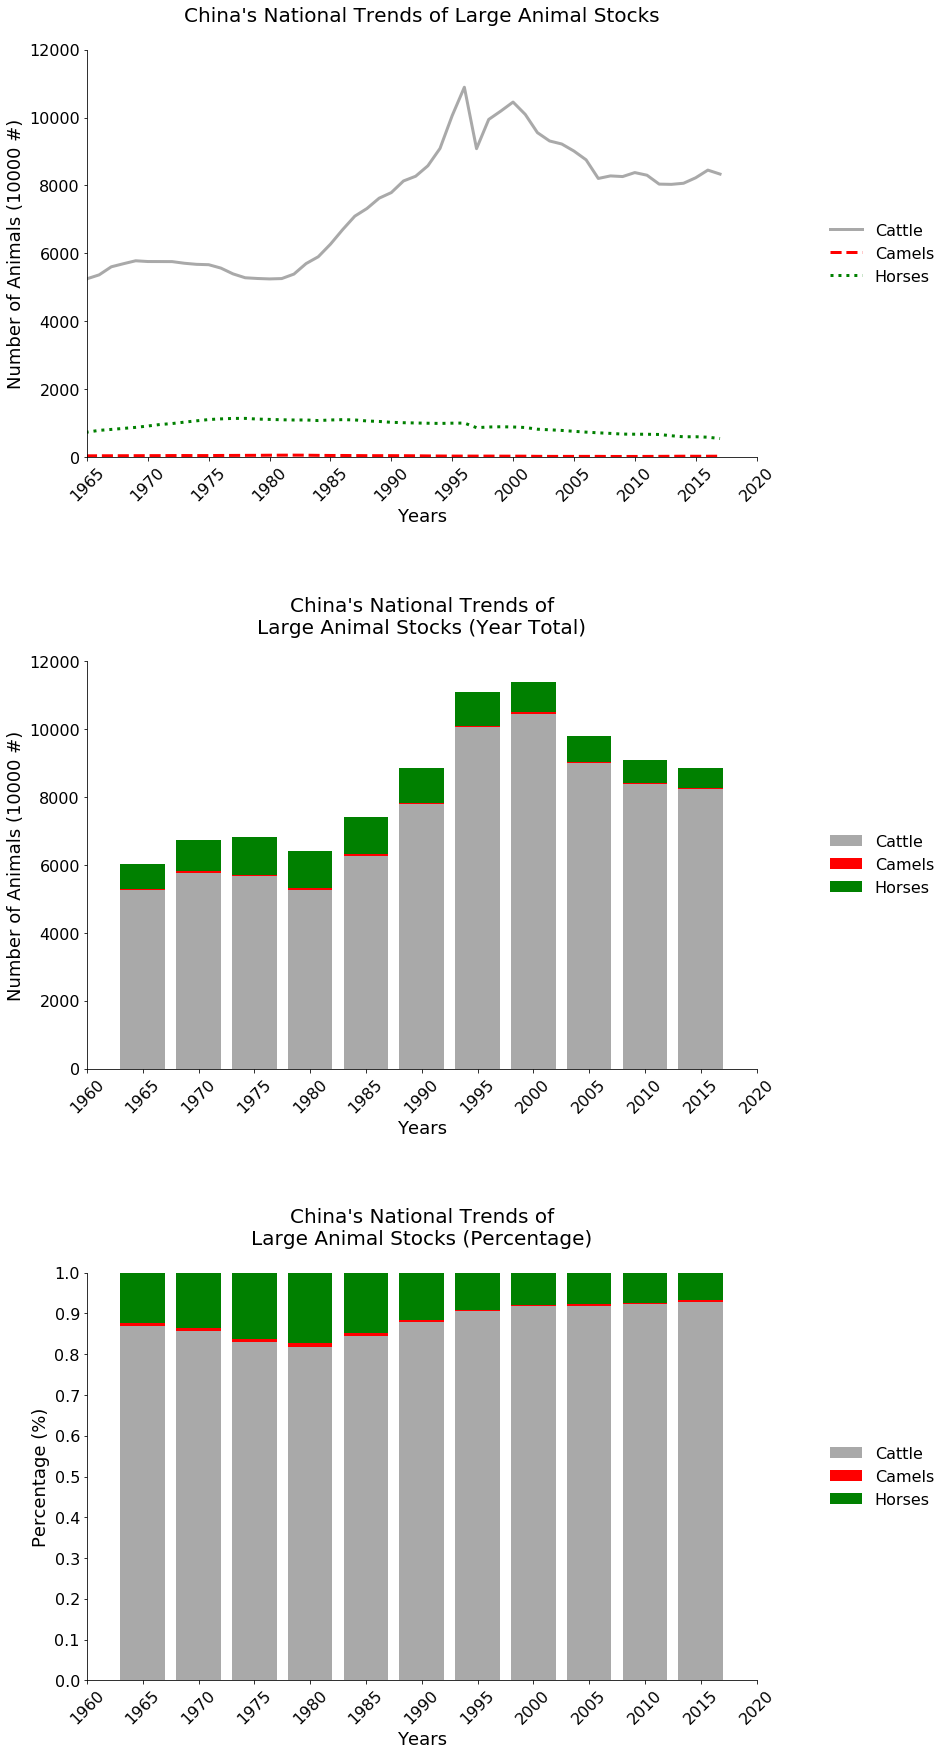

In [104]:
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          
plt.subplots_adjust(wspace =0.3, hspace =0.5)

# data frame of all large animal stocks
items = large_st

# data frame of each large animal stocks
dfs_large_st = {}
for n in range(0, len(items)):
    dfs_large_st[items[n]] = df_st[df_st['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# Draw Trends Line-------------------------------------------------------------------------------------

ax0 = fig.add_subplot(3,1,1)
plt.title("China's National Trends of Large Animal Stocks\n", fontsize=tit_size)

# draw lines of animal productions of livestocks
for n in range(0, len(items)):
    dfs_large_st[items[n]].plot.line(x='Year', 
                                      c=colors[n], 
                                      ls=linestyles[n], 
                                      lw=3, 
                                      ax=ax0)
    
ax0.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax0)

Xs = range(1965,2025,5)
setX_years(ax0, Xs)

Ys = range(0, 14000, 2000)
setY_num(ax0, Ys)


# Draw Stack Bar----------------------------------------------------------------------------------------

wid = 4
years = list(range(1965,2020,5))
# ------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(3,1,2)
plt.title("China's National Trends of\nLarge Animal Stocks (Year Total)\n", fontsize=tit_size)

# draw a bars
plt.bar(years, np.array(dfs_large_st[items[0]][dfs_large_st[items[0]]['Year'].isin(years)]['Value']),
        color=colors[0], width=wid)

bot=np.array(dfs_large_st[items[0]][dfs_large_st[items[0]]['Year'].isin(years)]['Value'])
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_large_st[items[n]][dfs_large_st[items[n]]['Year'].isin(years)]['Value']),
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_large_st[items[n]][dfs_large_st[items[n]]['Year'].isin(years)]['Value'])
    
year_total = bot

ax1.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax1)

Xs = range(1960,2025,5)
setX_years(ax1, Xs)

Ys = range(0, 14000, 2000)
setY_num(ax1, Ys)


# --------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(3,1,3)
plt.title("China's National Trends of\nLarge Animal Stocks (Percentage)\n", fontsize=tit_size)


# draw a bars
plt.bar(years, np.array(dfs_large_st[items[0]][dfs_large_st[items[0]]['Year'].isin(years)]['Value'])/year_total,
        color=colors[0], width=wid)

bot=np.array(dfs_large_st[items[0]][dfs_large_st[items[0]]['Year'].isin(years)]['Value'])/year_total
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_large_st[items[n]][dfs_large_st[items[n]]['Year'].isin(years)]['Value'])/year_total,
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_large_st[items[n]][dfs_large_st[items[n]]['Year'].isin(years)]['Value'])/year_total

ax2.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax2)

Xs = range(1960,2025,5)
setX_years(ax2, Xs)

Ys = np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2)
setY_per(ax2, Ys)


plt.show()

#### Pig, Goat and Sheep Stocks

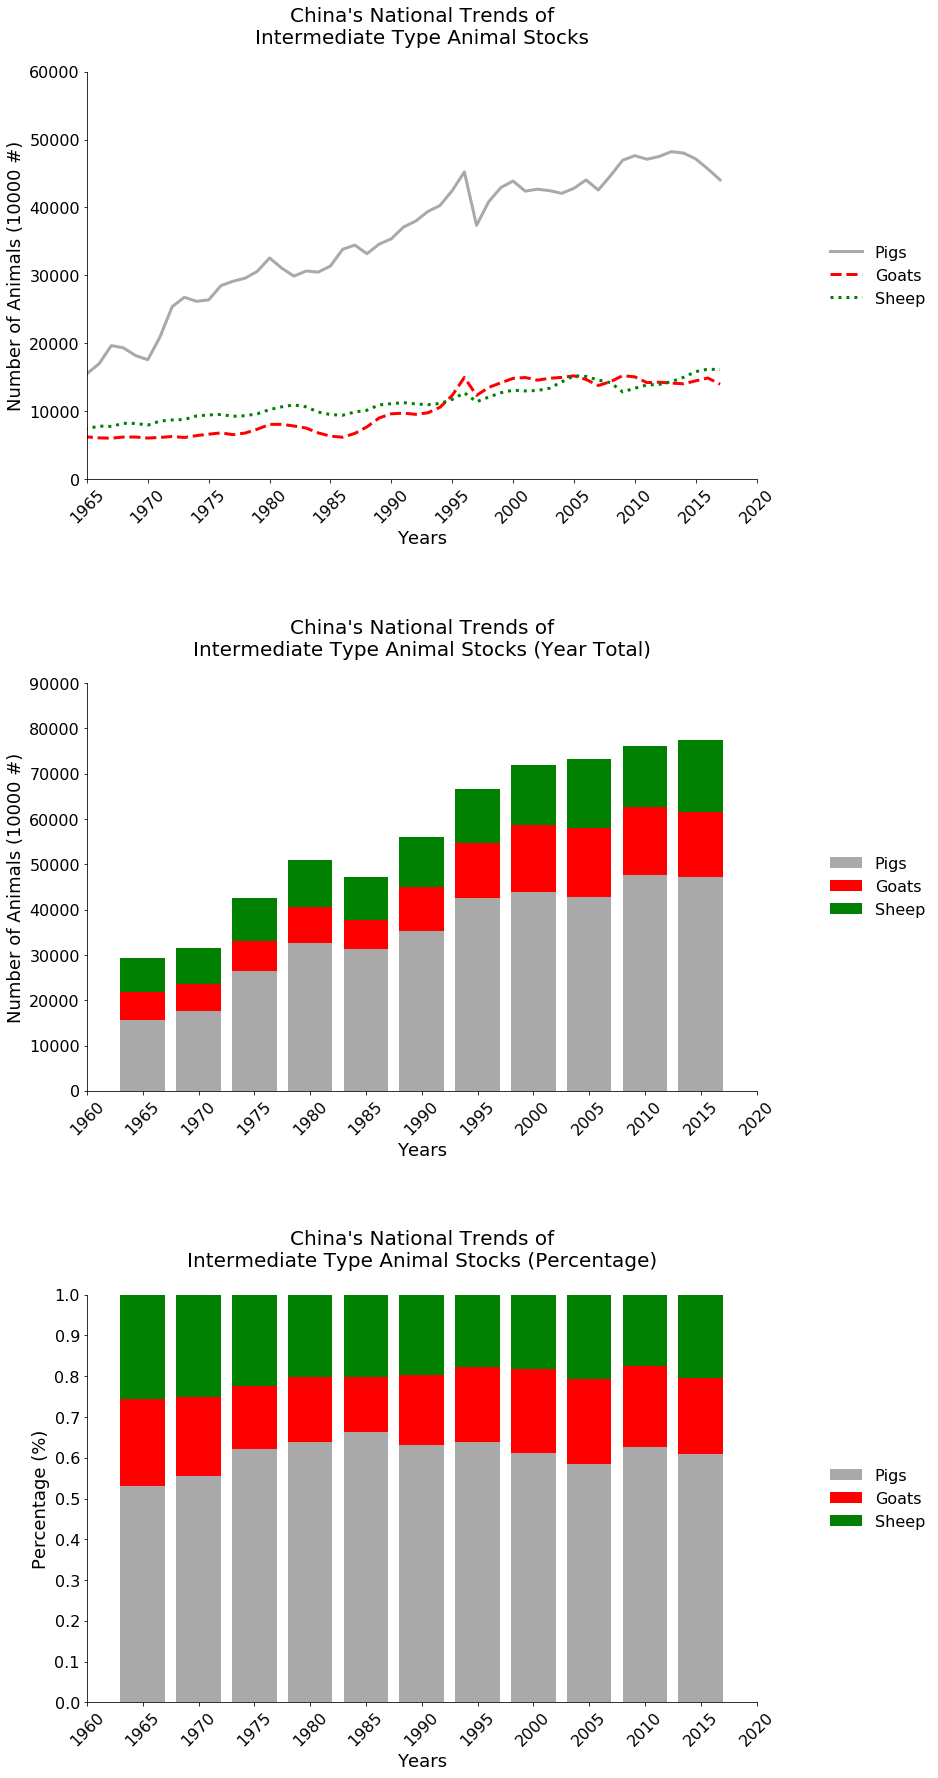

In [105]:
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          
plt.subplots_adjust(wspace =0.3, hspace =0.5)

# data frame of all middle type animal stocks
items = mid_st

# data frame of each middle type animal stocks
dfs_mid_st = {}
for n in range(0, len(items)):
    dfs_mid_st[items[n]] = df_st[df_st['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# Draw Trends Line-------------------------------------------------------------------------------------

ax0 = fig.add_subplot(3,1,1)
plt.title("China's National Trends of\nIntermediate Type Animal Stocks\n", fontsize=tit_size)

# draw lines of animal productions of livestocks
for n in range(0, len(items)):
    dfs_mid_st[items[n]].plot.line(x='Year', 
                                      c=colors[n], 
                                      ls=linestyles[n], 
                                      lw=3, 
                                      ax=ax0)
    
ax0.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax0)

Xs = range(1965,2025,5)
setX_years(ax0, Xs)

Ys = range(0, 70000, 10000)
setY_num(ax0, Ys)


# Draw Stack Bar----------------------------------------------------------------------------------------

wid = 4
years = list(range(1965,2020,5))
# ------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(3,1,2)
plt.title("China's National Trends of\nIntermediate Type Animal Stocks (Year Total)\n", fontsize=tit_size)

# draw a bars
plt.bar(years, np.array(dfs_mid_st[items[0]][dfs_mid_st[items[0]]['Year'].isin(years)]['Value']),
        color=colors[0], width=wid)

bot=np.array(dfs_mid_st[items[0]][dfs_mid_st[items[0]]['Year'].isin(years)]['Value'])
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_mid_st[items[n]][dfs_mid_st[items[n]]['Year'].isin(years)]['Value']),
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_mid_st[items[n]][dfs_mid_st[items[n]]['Year'].isin(years)]['Value'])
    
year_total = bot

ax1.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax1)

Xs = range(1960,2025,5)
setX_years(ax1, Xs)

Ys = range(0, 100000, 10000)
setY_num(ax1, Ys)


# --------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(3,1,3)
plt.title("China's National Trends of\nIntermediate Type Animal Stocks (Percentage)\n", fontsize=tit_size)


# draw a bars
plt.bar(years, np.array(dfs_mid_st[items[0]][dfs_mid_st[items[0]]['Year'].isin(years)]['Value'])/year_total,
        color=colors[0], width=wid)

bot=np.array(dfs_mid_st[items[0]][dfs_mid_st[items[0]]['Year'].isin(years)]['Value'])/year_total
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_mid_st[items[n]][dfs_mid_st[items[n]]['Year'].isin(years)]['Value'])/year_total,
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_mid_st[items[n]][dfs_mid_st[items[n]]['Year'].isin(years)]['Value'])/year_total

ax2.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax2)

Xs = range(1960,2025,5)
setX_years(ax2, Xs)

Ys = np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2)
setY_per(ax2, Ys)


plt.show()

#### Birds Stocks

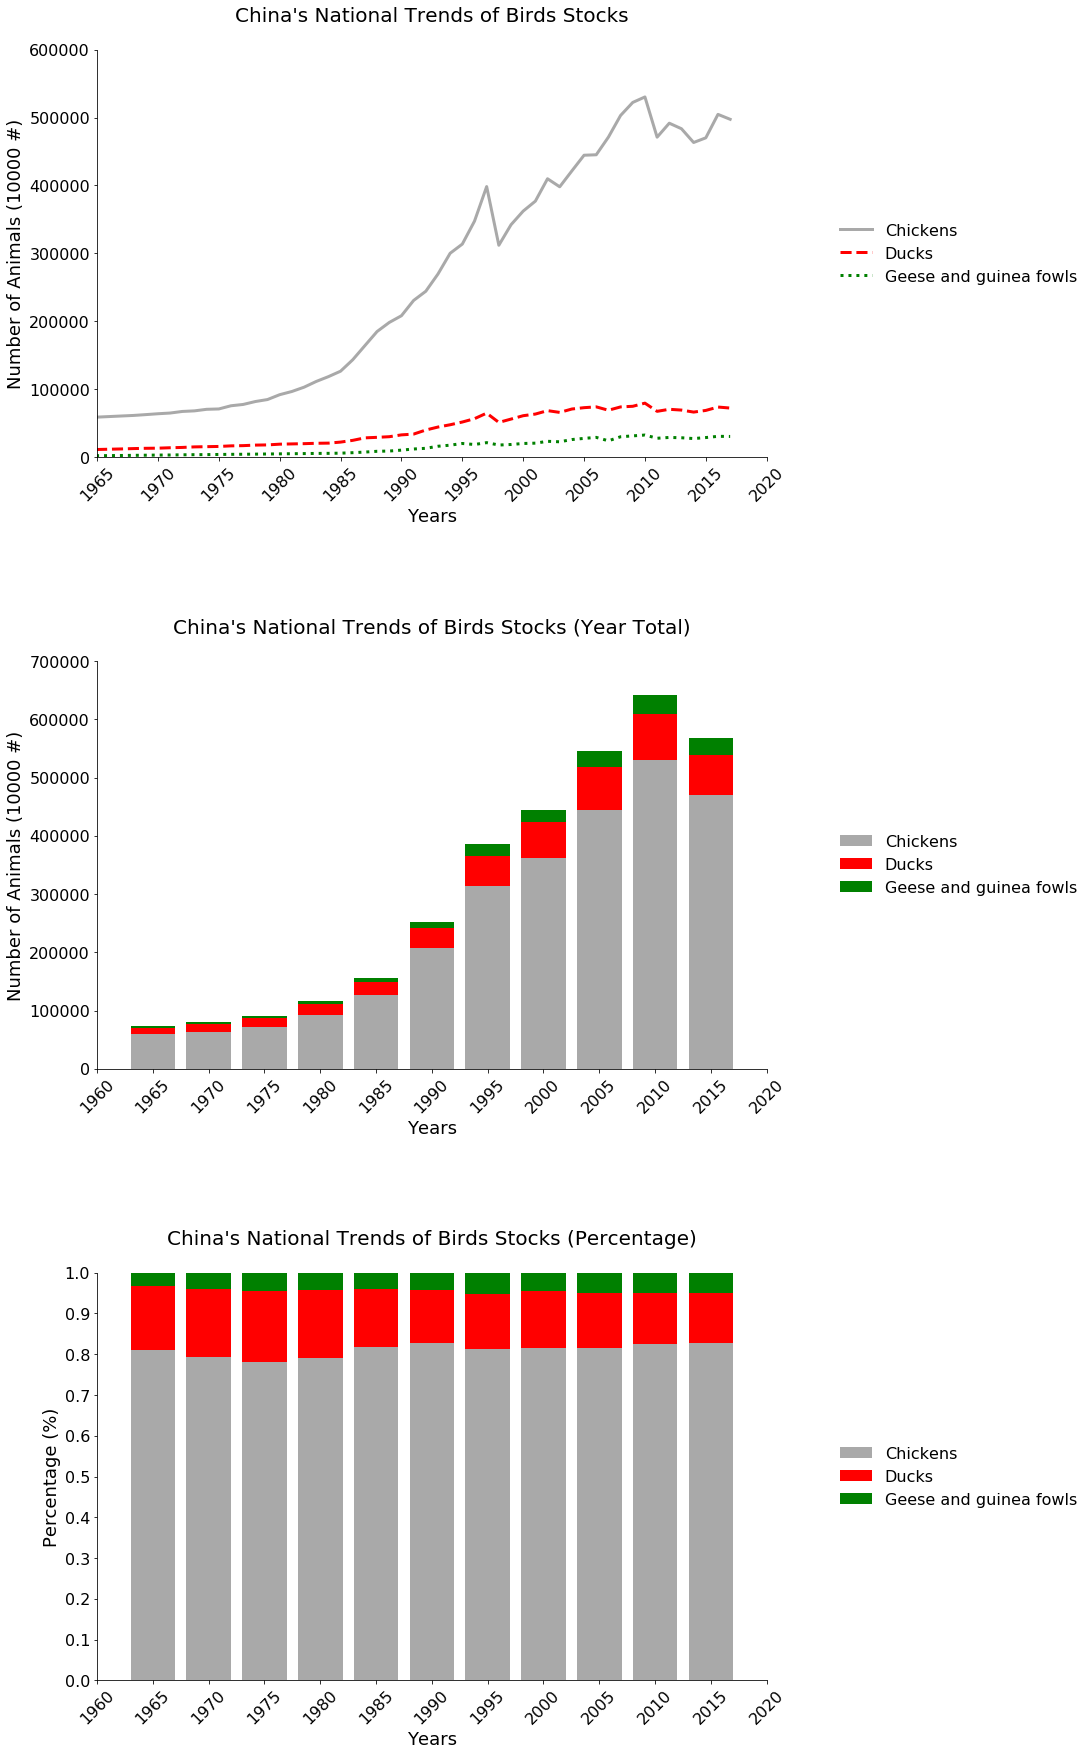

In [106]:
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          
plt.subplots_adjust(wspace =0.3, hspace =0.5)

# data frame of all birds stocks
items = bird_st

# data frame of each kind of birds stocks
dfs_bird_st = {}
for n in range(0, len(items)):
    dfs_bird_st[items[n]] = df_st[df_st['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# Draw Trends Line-------------------------------------------------------------------------------------

ax0 = fig.add_subplot(3,1,1)
plt.title("China's National Trends of Birds Stocks\n", fontsize=tit_size)

# draw lines of animal productions of livestocks
for n in range(0, len(items)):
    dfs_bird_st[items[n]].plot.line(x='Year', 
                                      c=colors[n], 
                                      ls=linestyles[n], 
                                      lw=3, 
                                      ax=ax0)
    
ax0.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax0)

Xs = range(1965,2025,5)
setX_years(ax0, Xs)

Ys = range(0, 700000, 100000)
setY_num(ax0, Ys)


# Draw Stack Bar----------------------------------------------------------------------------------------

wid = 4
years = list(range(1965,2020,5))
# ------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(3,1,2)
plt.title("China's National Trends of Birds Stocks (Year Total)\n", fontsize=tit_size)

# draw a bars
plt.bar(years, np.array(dfs_bird_st[items[0]][dfs_bird_st[items[0]]['Year'].isin(years)]['Value']),
        color=colors[0], width=wid)

bot=np.array(dfs_bird_st[items[0]][dfs_bird_st[items[0]]['Year'].isin(years)]['Value'])
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_bird_st[items[n]][dfs_bird_st[items[n]]['Year'].isin(years)]['Value']),
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_bird_st[items[n]][dfs_bird_st[items[n]]['Year'].isin(years)]['Value'])
    
year_total = bot

ax1.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax1)

Xs = range(1960,2025,5)
setX_years(ax1, Xs)

Ys = range(0, 800000, 100000)
setY_num(ax1, Ys)


# --------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(3,1,3)
plt.title("China's National Trends of Birds Stocks (Percentage)\n", fontsize=tit_size)


# draw a bars
plt.bar(years, np.array(dfs_bird_st[items[0]][dfs_bird_st[items[0]]['Year'].isin(years)]['Value'])/year_total,
        color=colors[0], width=wid)

bot=np.array(dfs_bird_st[items[0]][dfs_bird_st[items[0]]['Year'].isin(years)]['Value'])/year_total
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_bird_st[items[n]][dfs_bird_st[items[n]]['Year'].isin(years)]['Value'])/year_total,
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_bird_st[items[n]][dfs_bird_st[items[n]]['Year'].isin(years)]['Value'])/year_total

ax2.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)



setSpi_LB(ax2)

Xs = range(1960,2025,5)
setX_years(ax2, Xs)

Ys = np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2)
setY_per(ax2, Ys)


plt.show()

### Slaughtered Animals

In [107]:
df_sl=df[(df['Element']=='Producing Animals/Slaughtered')][['Year','Item','Value']]

#### Slaughtered Large Animals

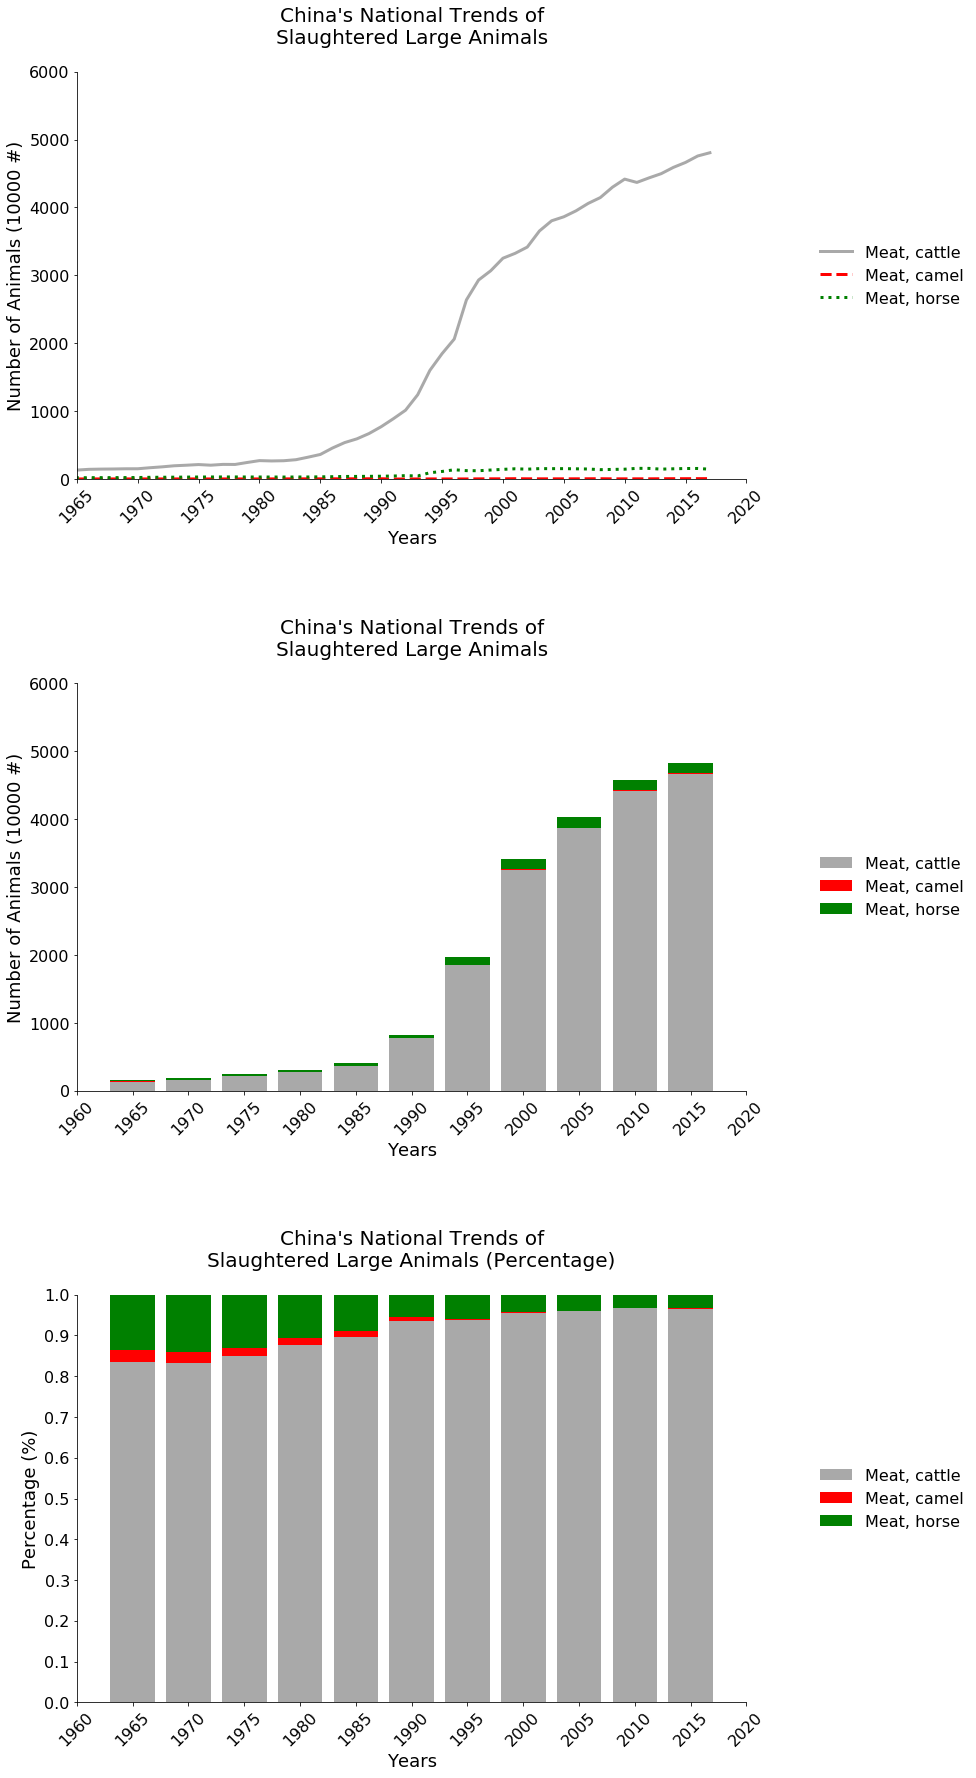

In [108]:
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          
plt.subplots_adjust(wspace =0.3, hspace =0.5)

# data frame of all birds stocks
items = large_mt

# data frame of each kind of birds stocks
dfs_large_sl = {}
for n in range(0, len(items)):
    dfs_large_sl[items[n]] = df_sl[df_sl['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# Draw Trends Line-------------------------------------------------------------------------------------

ax0 = fig.add_subplot(3,1,1)
plt.title("China's National Trends of\nSlaughtered Large Animals\n", fontsize=tit_size)

# draw lines of animal productions of livestocks
for n in range(0, len(items)):
    dfs_large_sl[items[n]].plot.line(x='Year', 
                                      c=colors[n], 
                                      ls=linestyles[n], 
                                      lw=3, 
                                      ax=ax0)
    
ax0.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax0)

Xs = range(1965,2025,5)
setX_years(ax0, Xs)

Ys = range(0, 7000, 1000)
setY_num(ax0, Ys)


# Draw Stack Bar----------------------------------------------------------------------------------------

wid = 4
years = list(range(1965,2020,5))
# ------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(3,1,2)
plt.title("China's National Trends of\nSlaughtered Large Animals\n", fontsize=tit_size)

# draw a bars
plt.bar(years, np.array(dfs_large_sl[items[0]][dfs_large_sl[items[0]]['Year'].isin(years)]['Value']),
        color=colors[0], width=wid)

bot=np.array(dfs_large_sl[items[0]][dfs_large_sl[items[0]]['Year'].isin(years)]['Value'])
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_large_sl[items[n]][dfs_large_sl[items[n]]['Year'].isin(years)]['Value']),
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_large_sl[items[n]][dfs_large_sl[items[n]]['Year'].isin(years)]['Value'])
    
year_total = bot

ax1.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax1)

Xs = range(1960,2025,5)
setX_years(ax1, Xs)

Ys = range(0, 7000, 1000)
setY_num(ax1, Ys)


# --------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(3,1,3)
plt.title("China's National Trends of\nSlaughtered Large Animals (Percentage)\n", fontsize=tit_size)


# draw a bars
plt.bar(years, np.array(dfs_large_sl[items[0]][dfs_large_sl[items[0]]['Year'].isin(years)]['Value'])/year_total,
        color=colors[0], width=wid)

bot=np.array(dfs_large_sl[items[0]][dfs_large_sl[items[0]]['Year'].isin(years)]['Value'])/year_total
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_large_sl[items[n]][dfs_large_sl[items[n]]['Year'].isin(years)]['Value'])/year_total,
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_large_sl[items[n]][dfs_large_sl[items[n]]['Year'].isin(years)]['Value'])/year_total

ax2.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax2)

Xs = range(1960,2025,5)
setX_years(ax2, Xs)

Ys = np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2)
setY_per(ax2, Ys)


plt.show()

#### Slaughtered Intermediate Type Animals

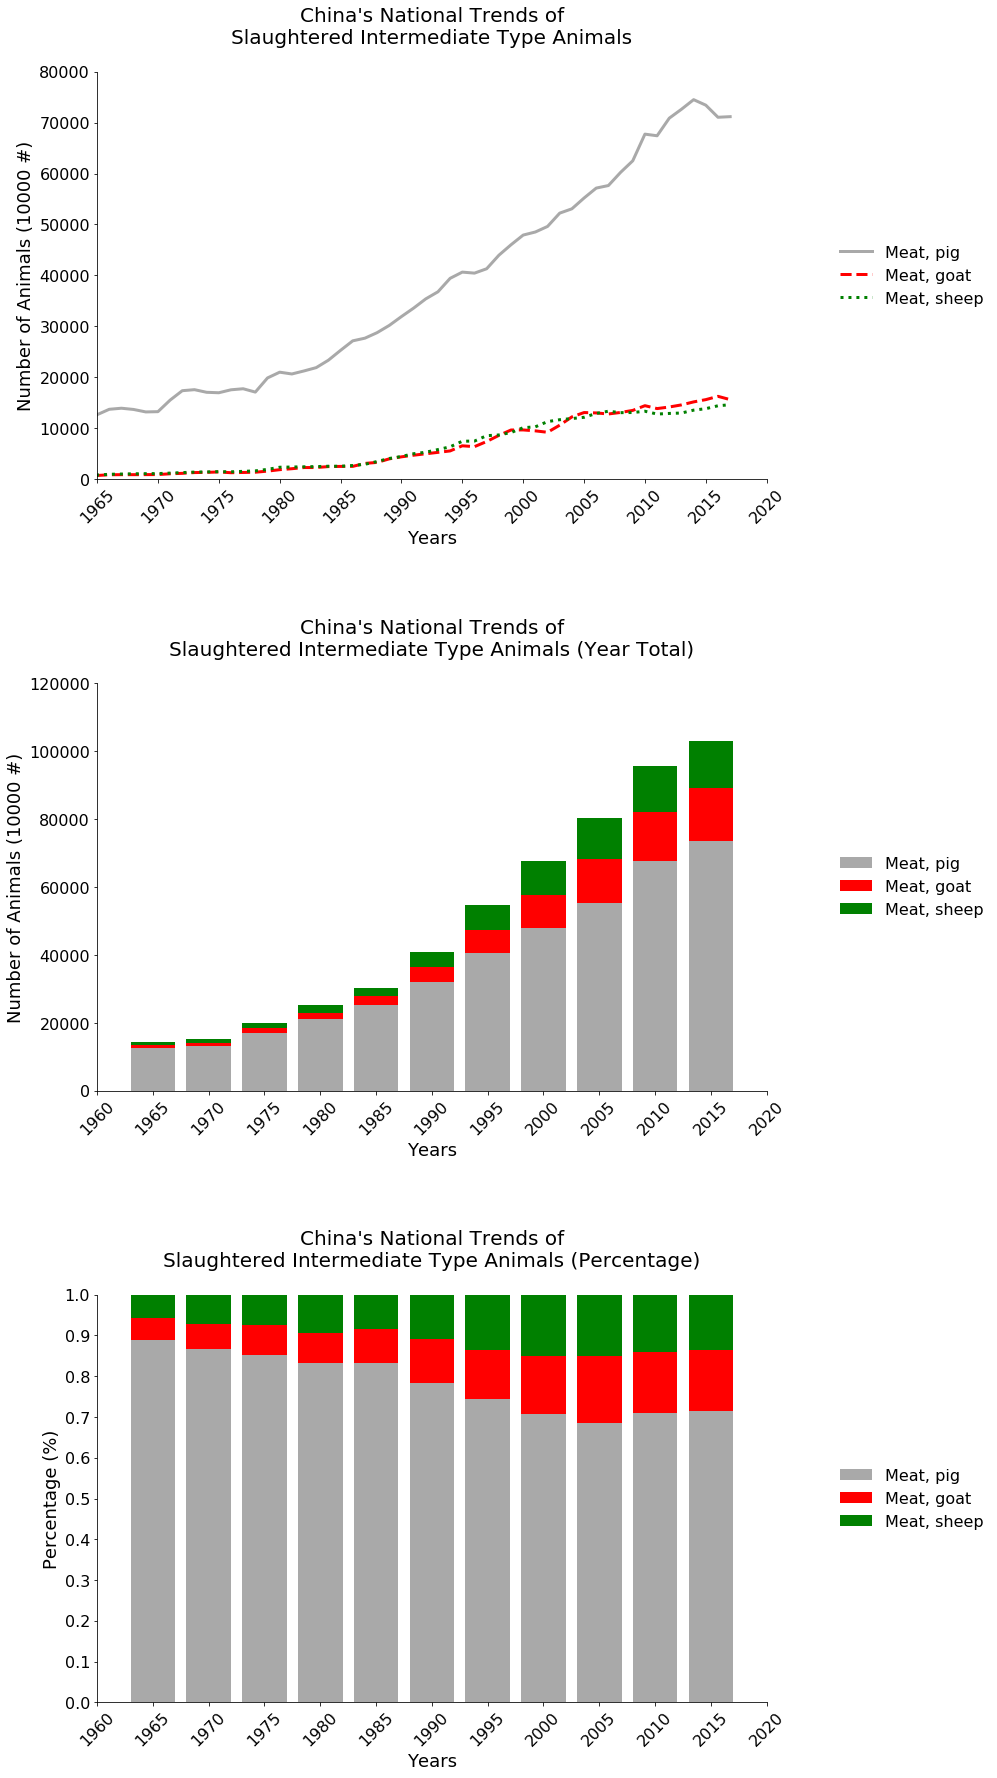

In [128]:
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          
plt.subplots_adjust(wspace =0.3, hspace =0.5)

# data frame of all birds stocks
items = mid_mt

# data frame of each kind of birds stocks
dfs_mid_sl = {}
for n in range(0, len(items)):
    dfs_mid_sl[items[n]] = df_sl[df_sl['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# Draw Trends Line-------------------------------------------------------------------------------------

ax0 = fig.add_subplot(3,1,1)
plt.title("China's National Trends of\nSlaughtered Intermediate Type Animals\n", fontsize=tit_size)

# draw lines of animal productions of livestocks
for n in range(0, len(items)):
    dfs_mid_sl[items[n]].plot.line(x='Year', 
                                      c=colors[n], 
                                      ls=linestyles[n], 
                                      lw=3, 
                                      ax=ax0)
    
ax0.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax0)

Xs = range(1965,2025,5)
setX_years(ax0, Xs)

Ys = range(0, 90000, 10000)
setY_num(ax0, Ys)


# Draw Stack Bar----------------------------------------------------------------------------------------

wid = 4
years = list(range(1965,2020,5))
# ------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(3,1,2)
plt.title("China's National Trends of\nSlaughtered Intermediate Type Animals (Year Total)\n", fontsize=tit_size)

# draw a bars
plt.bar(years, np.array(dfs_mid_sl[items[0]][dfs_mid_sl[items[0]]['Year'].isin(years)]['Value']),
        color=colors[0], width=wid)

bot=np.array(dfs_mid_sl[items[0]][dfs_mid_sl[items[0]]['Year'].isin(years)]['Value'])
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_mid_sl[items[n]][dfs_mid_sl[items[n]]['Year'].isin(years)]['Value']),
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_mid_sl[items[n]][dfs_mid_sl[items[n]]['Year'].isin(years)]['Value'])
    
year_total = bot

ax1.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax1)

Xs = range(1960,2025,5)
setX_years(ax1, Xs)

Ys = range(0, 140000, 20000)
setY_num(ax1, Ys)


# --------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(3,1,3)
plt.title("China's National Trends of\nSlaughtered Intermediate Type Animals (Percentage)\n", fontsize=tit_size)


# draw a bars
plt.bar(years, np.array(dfs_mid_sl[items[0]][dfs_mid_sl[items[0]]['Year'].isin(years)]['Value'])/year_total,
        color=colors[0], width=wid)

bot=np.array(dfs_mid_sl[items[0]][dfs_mid_sl[items[0]]['Year'].isin(years)]['Value'])/year_total
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_mid_sl[items[n]][dfs_mid_sl[items[n]]['Year'].isin(years)]['Value'])/year_total,
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_mid_sl[items[n]][dfs_mid_sl[items[n]]['Year'].isin(years)]['Value'])/year_total

ax2.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax2)

Xs = range(1960,2025,5)
setX_years(ax2, Xs)

Ys = np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2)
setY_per(ax2, Ys)


plt.show()

#### Slaughtered Birds

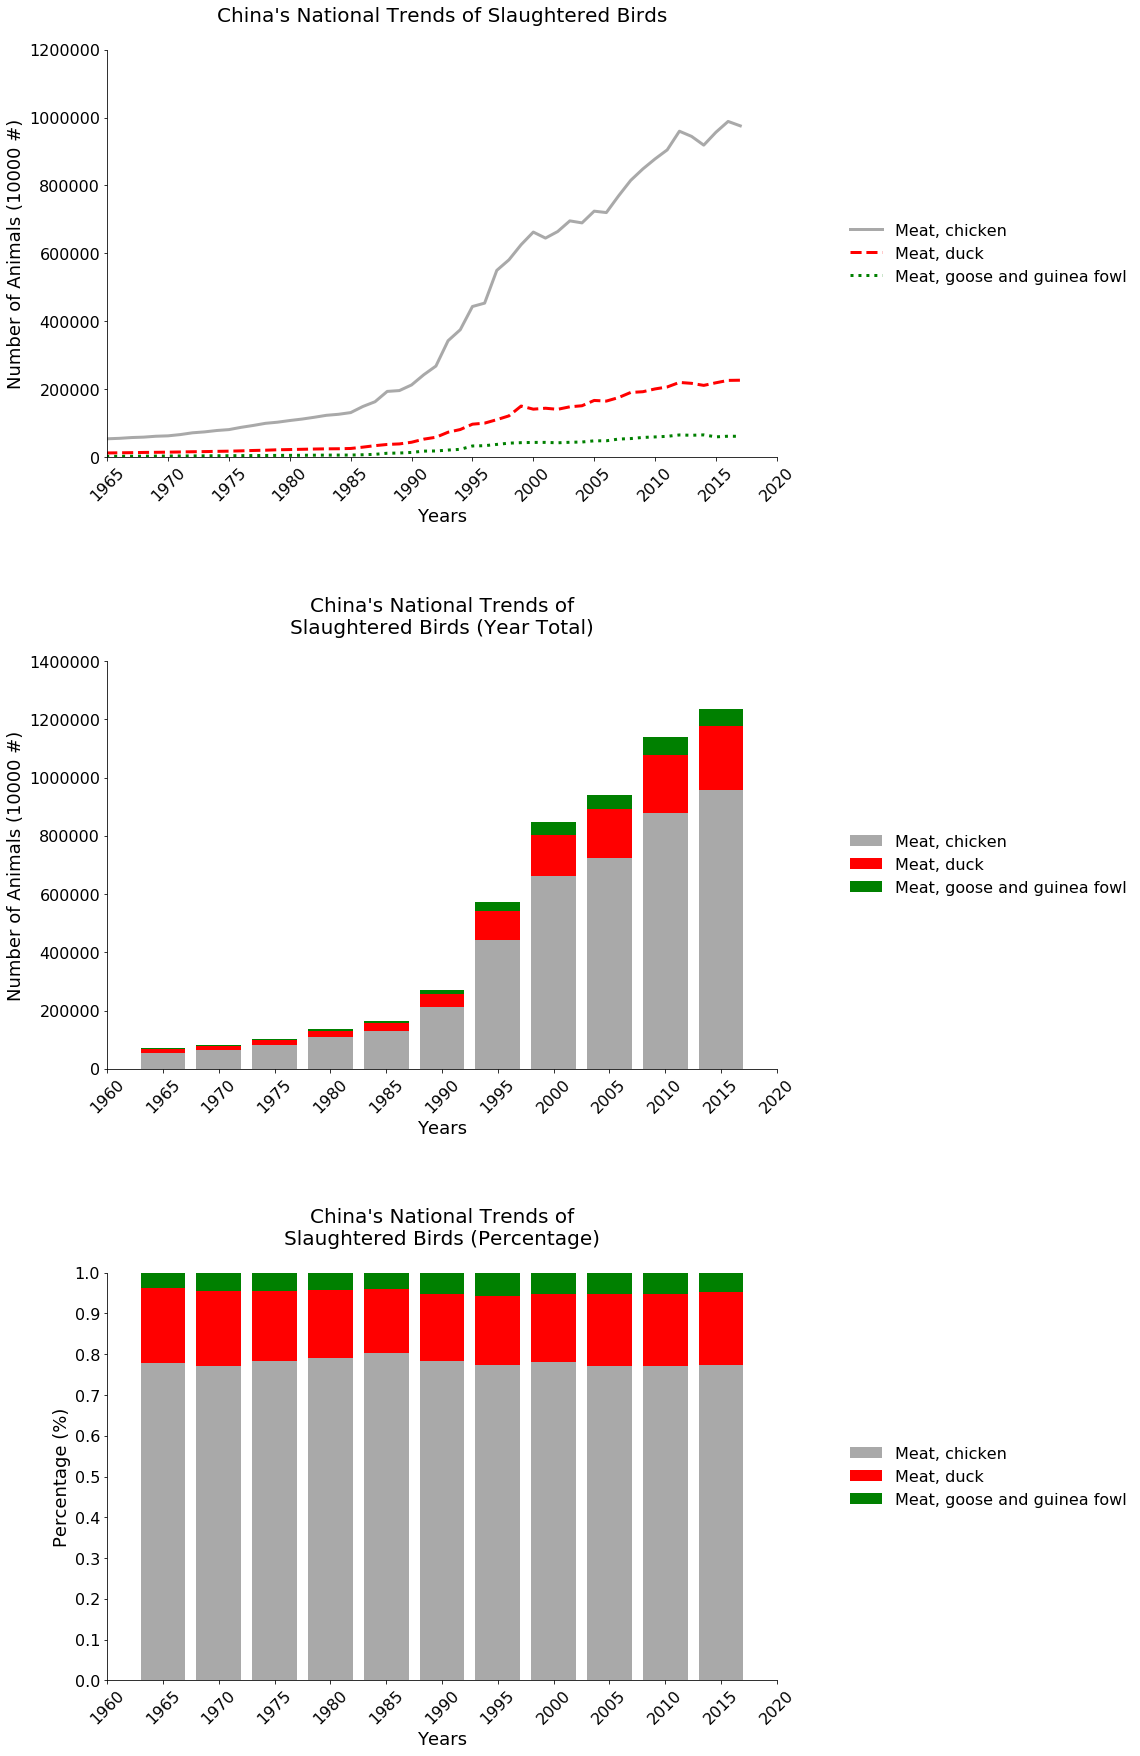

In [124]:
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          
plt.subplots_adjust(wspace =0.3, hspace =0.5)

# data frame of all birds stocks
items = bird_mt

# data frame of each kind of birds stocks
dfs_bird_sl = {}
for n in range(0, len(items)):
    dfs_bird_sl[items[n]] = df_sl[df_sl['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# Draw Trends Line-------------------------------------------------------------------------------------

ax0 = fig.add_subplot(3,1,1)
plt.title("China's National Trends of Slaughtered Birds\n", fontsize=tit_size)

# draw lines of animal productions of livestocks
for n in range(0, len(items)):
    dfs_bird_sl[items[n]].plot.line(x='Year', 
                                      c=colors[n], 
                                      ls=linestyles[n], 
                                      lw=3, 
                                      ax=ax0)
    
ax0.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax0)

Xs = range(1965,2025,5)
setX_years(ax0, Xs)

Ys = range(0, 1400000, 200000)
setY_num(ax0, Ys)


# Draw Stack Bar----------------------------------------------------------------------------------------

wid = 4
years = list(range(1965,2020,5))
# ------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(3,1,2)
plt.title("China's National Trends of\nSlaughtered Birds (Year Total)\n", fontsize=tit_size)

# draw a bars
plt.bar(years, np.array(dfs_bird_sl[items[0]][dfs_bird_sl[items[0]]['Year'].isin(years)]['Value']),
        color=colors[0], width=wid)

bot=np.array(dfs_bird_sl[items[0]][dfs_bird_sl[items[0]]['Year'].isin(years)]['Value'])
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_bird_sl[items[n]][dfs_bird_sl[items[n]]['Year'].isin(years)]['Value']),
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_bird_sl[items[n]][dfs_bird_sl[items[n]]['Year'].isin(years)]['Value'])
    
year_total = bot

ax1.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax1)

Xs = range(1960,2025,5)
setX_years(ax1, Xs)

Ys = range(0, 1600000, 200000)
setY_num(ax1, Ys)


# --------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(3,1,3)
plt.title("China's National Trends of\nSlaughtered Birds (Percentage)\n", fontsize=tit_size)


# draw a bars
plt.bar(years, np.array(dfs_bird_sl[items[0]][dfs_bird_sl[items[0]]['Year'].isin(years)]['Value'])/year_total,
        color=colors[0], width=wid)

bot=np.array(dfs_bird_sl[items[0]][dfs_bird_sl[items[0]]['Year'].isin(years)]['Value'])/year_total
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_bird_sl[items[n]][dfs_bird_sl[items[n]]['Year'].isin(years)]['Value'])/year_total,
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_bird_sl[items[n]][dfs_bird_sl[items[n]]['Year'].isin(years)]['Value'])/year_total

ax2.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax2)

Xs = range(1960,2025,5)
setX_years(ax2, Xs)

Ys = np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2)
setY_per(ax2, Ys)


plt.show()

### Production of Animal Products

#### Production of Meat

After Exploring the Stocks and Slaughtered animals, we know that the main kinds of animals for animal products include: Cattles, Goats, Sheep, Pigs, Chickens, and ducks.

So, the main kind of animal meat should include: meat of cattle, meat of goat, meat of sheep, meat of pig, meat of chicken, and meat of duck.

In [93]:
df_pd = df[(df['Element']=='Production')][['Year','Item','Value']]

In [94]:
meat_pd = ['Meat, cattle', 'Meat, goat', 'Meat, sheep', 'Meat, pig', 'Meat, chicken', 'Meat, duck']

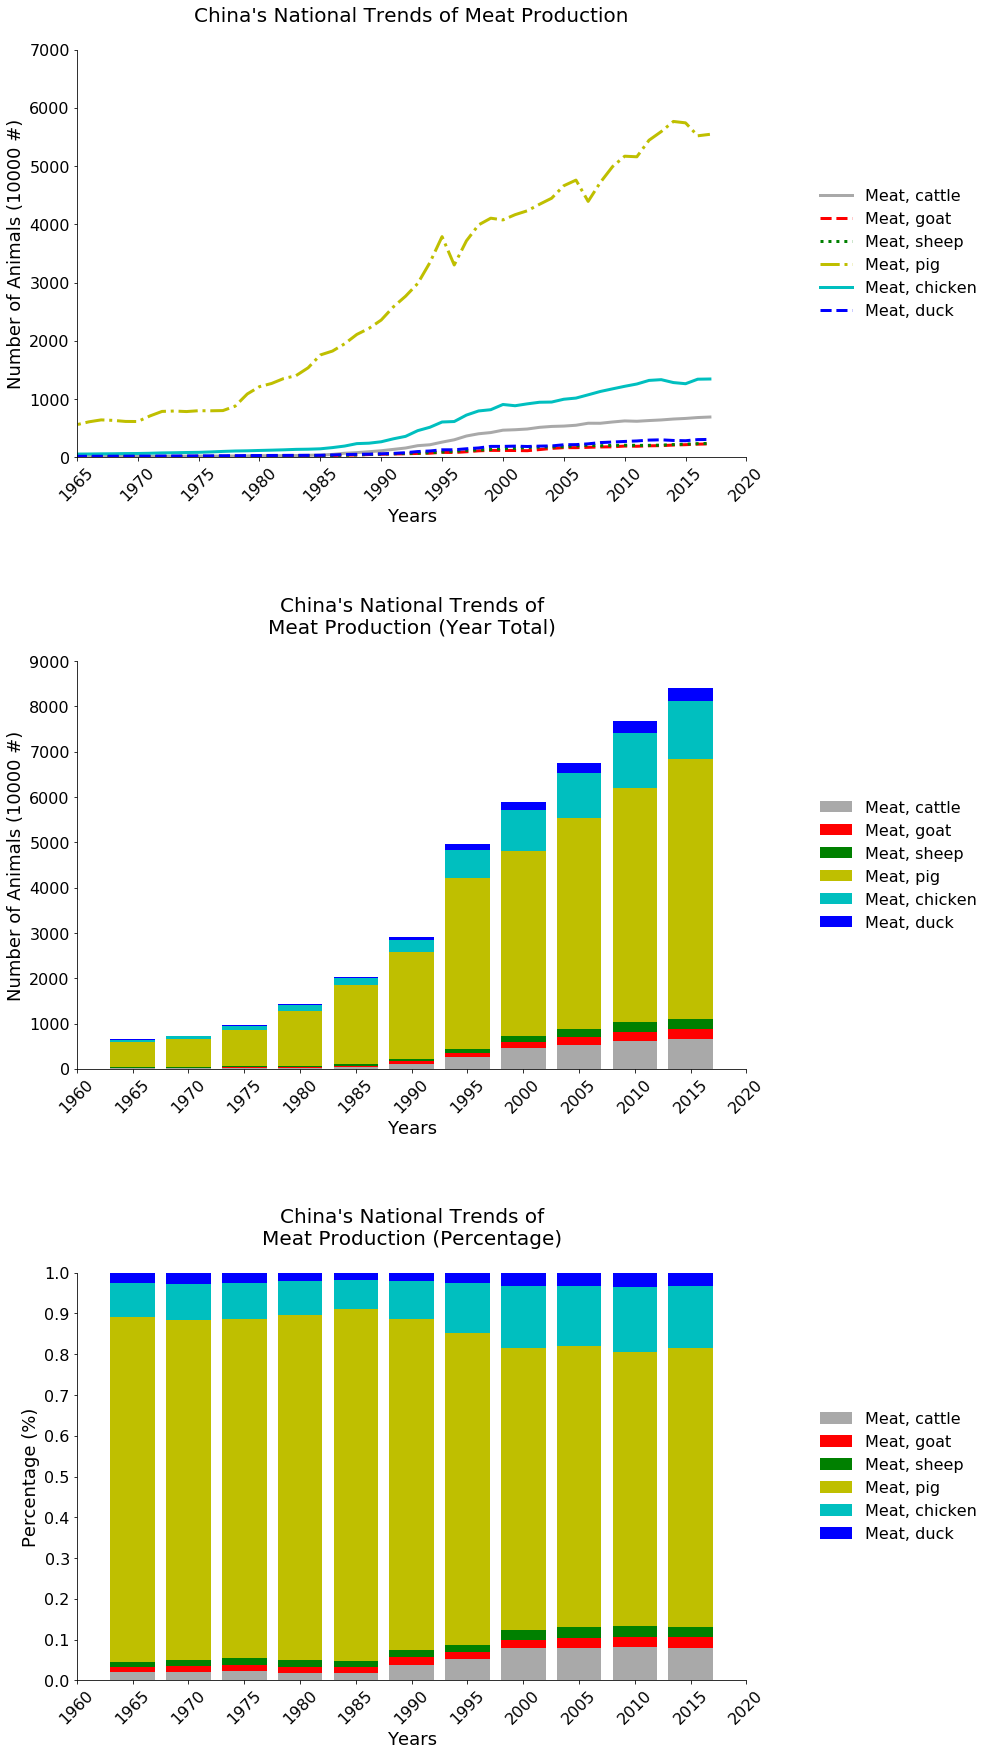

In [125]:
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          
plt.subplots_adjust(wspace =0.3, hspace =0.5)

# data frame of all birds stocks
items = meat_pd

# data frame of each kind of birds stocks
dfs_meat_pd = {}
for n in range(0, len(items)):
    dfs_meat_pd[items[n]] = df_pd[df_pd['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# Draw Trends Line-------------------------------------------------------------------------------------

ax0 = fig.add_subplot(3,1,1)
plt.title("China's National Trends of Meat Production\n", fontsize=tit_size)

# draw lines of animal productions of livestocks
for n in range(0, len(items)):
    dfs_meat_pd[items[n]].plot.line(x='Year', 
                                      color=colors[n], 
                                      ls=linestyles[n], 
                                      lw=3, 
                                      ax=ax0)
    
ax0.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax0)

Xs = range(1965,2025,5)
setX_years(ax0, Xs)

Ys = range(0, 8000, 1000)
setY_num(ax0, Ys)


# Draw Stack Bar----------------------------------------------------------------------------------------

wid = 4
years = list(range(1965,2020,5))
# ------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(3,1,2)
plt.title("China's National Trends of\nMeat Production (Year Total)\n", fontsize=tit_size)

# draw a bars
plt.bar(years, np.array(dfs_meat_pd[items[0]][dfs_meat_pd[items[0]]['Year'].isin(years)]['Value']),
        color=colors[0], width=wid)

bot=np.array(dfs_meat_pd[items[0]][dfs_meat_pd[items[0]]['Year'].isin(years)]['Value'])
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_meat_pd[items[n]][dfs_meat_pd[items[n]]['Year'].isin(years)]['Value']),
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_meat_pd[items[n]][dfs_meat_pd[items[n]]['Year'].isin(years)]['Value'])
    
year_total = bot

ax1.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax1)

Xs = range(1960,2025,5)
setX_years(ax1, Xs)

Ys = range(0, 10000, 1000)
setY_num(ax1, Ys)


# --------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(3,1,3)
plt.title("China's National Trends of\nMeat Production (Percentage)\n", fontsize=tit_size)


# draw a bars
plt.bar(years, np.array(dfs_meat_pd[items[0]][dfs_meat_pd[items[0]]['Year'].isin(years)]['Value'])/year_total,
        color=colors[0], width=wid)

bot=np.array(dfs_meat_pd[items[0]][dfs_meat_pd[items[0]]['Year'].isin(years)]['Value'])/year_total
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_meat_pd[items[n]][dfs_meat_pd[items[n]]['Year'].isin(years)]['Value'])/year_total,
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_meat_pd[items[n]][dfs_meat_pd[items[n]]['Year'].isin(years)]['Value'])/year_total

ax2.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax2)

Xs = range(1960,2025,5)
setX_years(ax2, Xs)

Ys = np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2)
setY_per(ax2, Ys)


plt.show()

#### Production of Birds Egg

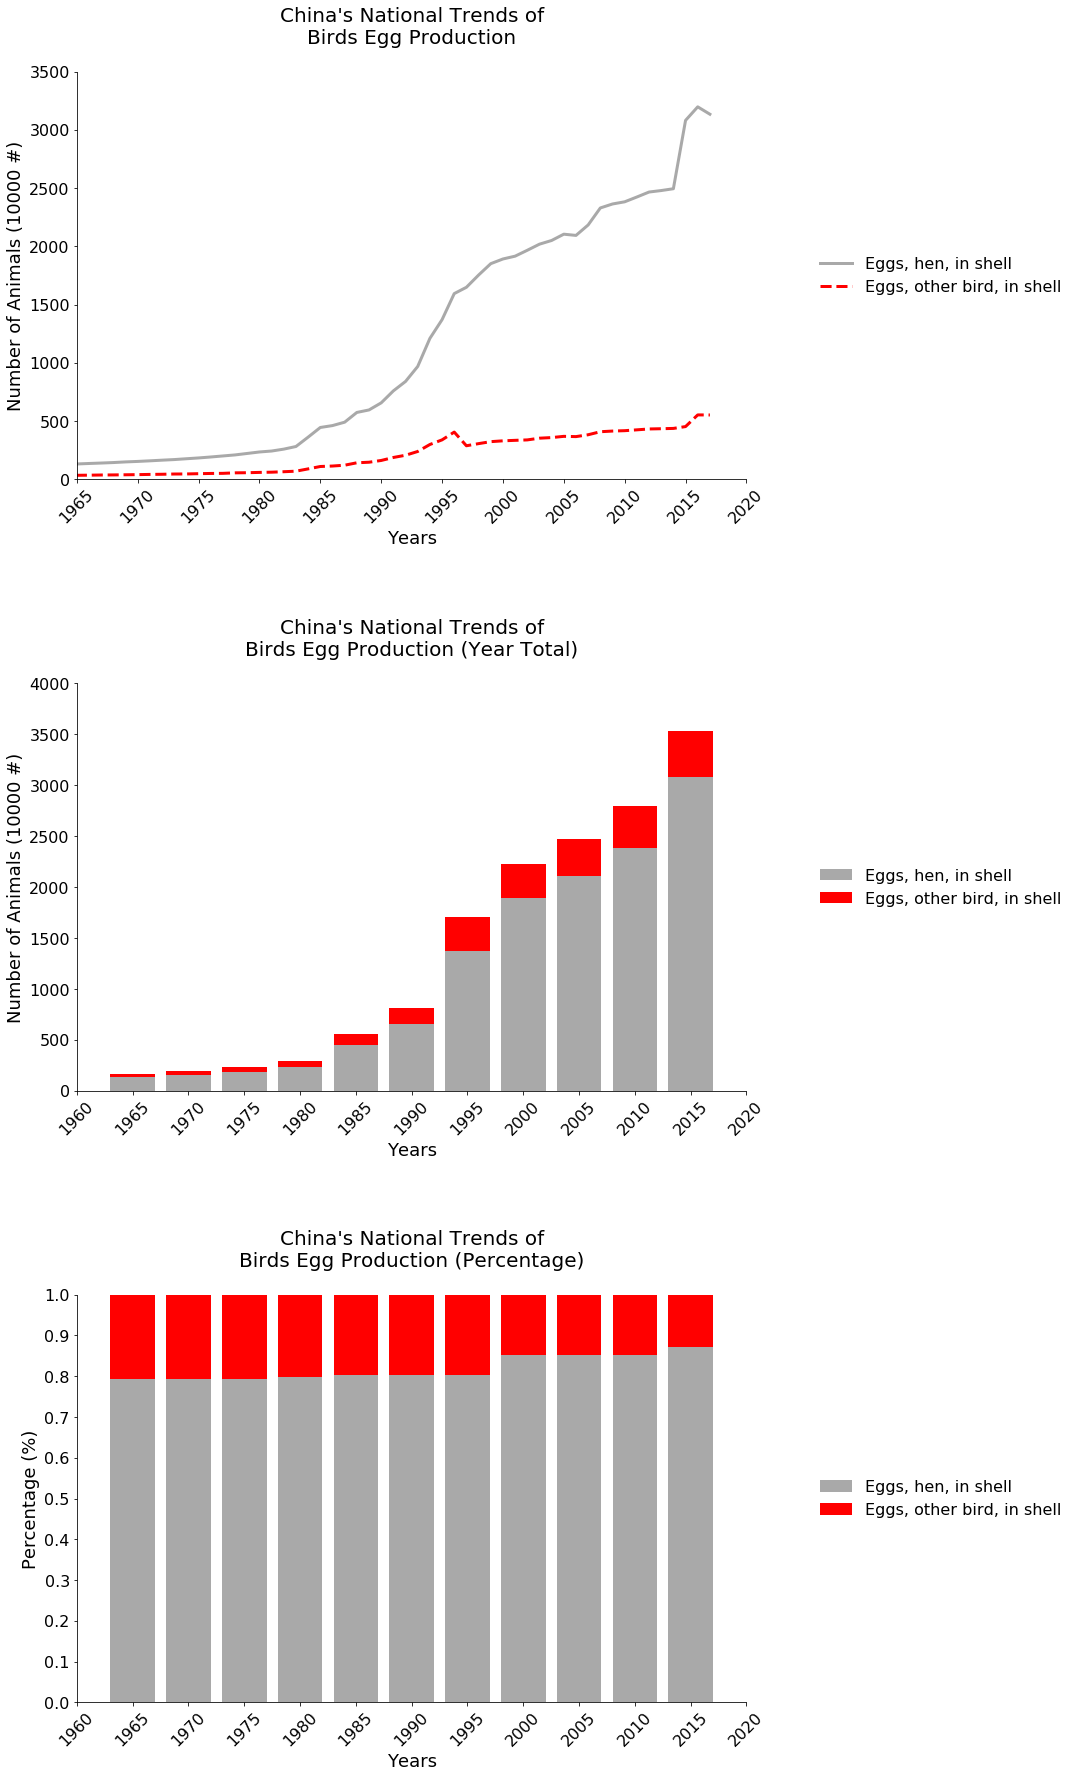

In [126]:
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          
plt.subplots_adjust(wspace =0.3, hspace =0.5)

# data frame of all birds stocks
items = egg

# data frame of each kind of birds stocks
dfs_egg_pd = {}
for n in range(0, len(items)):
    dfs_egg_pd[items[n]] = df_pd[df_pd['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# Draw Trends Line-------------------------------------------------------------------------------------

ax0 = fig.add_subplot(3,1,1)
plt.title("China's National Trends of\nBirds Egg Production\n", fontsize=tit_size)

# draw lines of animal productions of livestocks
for n in range(0, len(items)):
    dfs_egg_pd[items[n]].plot.line(x='Year', 
                                      color=colors[n], 
                                      ls=linestyles[n], 
                                      lw=3, 
                                      ax=ax0)
    
ax0.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax0)

Xs = range(1965,2025,5)
setX_years(ax0, Xs)

Ys = range(0, 4000, 500)
setY_num(ax0, Ys)


# Draw Stack Bar----------------------------------------------------------------------------------------

wid = 4
years = list(range(1965,2020,5))
# ------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(3,1,2)
plt.title("China's National Trends of\nBirds Egg Production (Year Total)\n", fontsize=tit_size)

# draw a bars
plt.bar(years, np.array(dfs_egg_pd[items[0]][dfs_egg_pd[items[0]]['Year'].isin(years)]['Value']),
        color=colors[0], width=wid)

bot=np.array(dfs_egg_pd[items[0]][dfs_egg_pd[items[0]]['Year'].isin(years)]['Value'])
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_egg_pd[items[n]][dfs_egg_pd[items[n]]['Year'].isin(years)]['Value']),
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_egg_pd[items[n]][dfs_egg_pd[items[n]]['Year'].isin(years)]['Value'])
    
year_total = bot

ax1.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax1)

Xs = range(1960,2025,5)
setX_years(ax1, Xs)

Ys = range(0, 4500, 500)
setY_num(ax1, Ys)


# --------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(3,1,3)
plt.title("China's National Trends of\nBirds Egg Production (Percentage)\n", fontsize=tit_size)


# draw a bars
plt.bar(years, np.array(dfs_egg_pd[items[0]][dfs_egg_pd[items[0]]['Year'].isin(years)]['Value'])/year_total,
        color=colors[0], width=wid)

bot=np.array(dfs_egg_pd[items[0]][dfs_egg_pd[items[0]]['Year'].isin(years)]['Value'])/year_total
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_egg_pd[items[n]][dfs_egg_pd[items[n]]['Year'].isin(years)]['Value'])/year_total,
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_egg_pd[items[n]][dfs_egg_pd[items[n]]['Year'].isin(years)]['Value'])/year_total

ax2.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax2)

Xs = range(1960,2025,5)
setX_years(ax2, Xs)

Ys = np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2)
setY_per(ax2, Ys)


plt.show()

#### Production of Milk

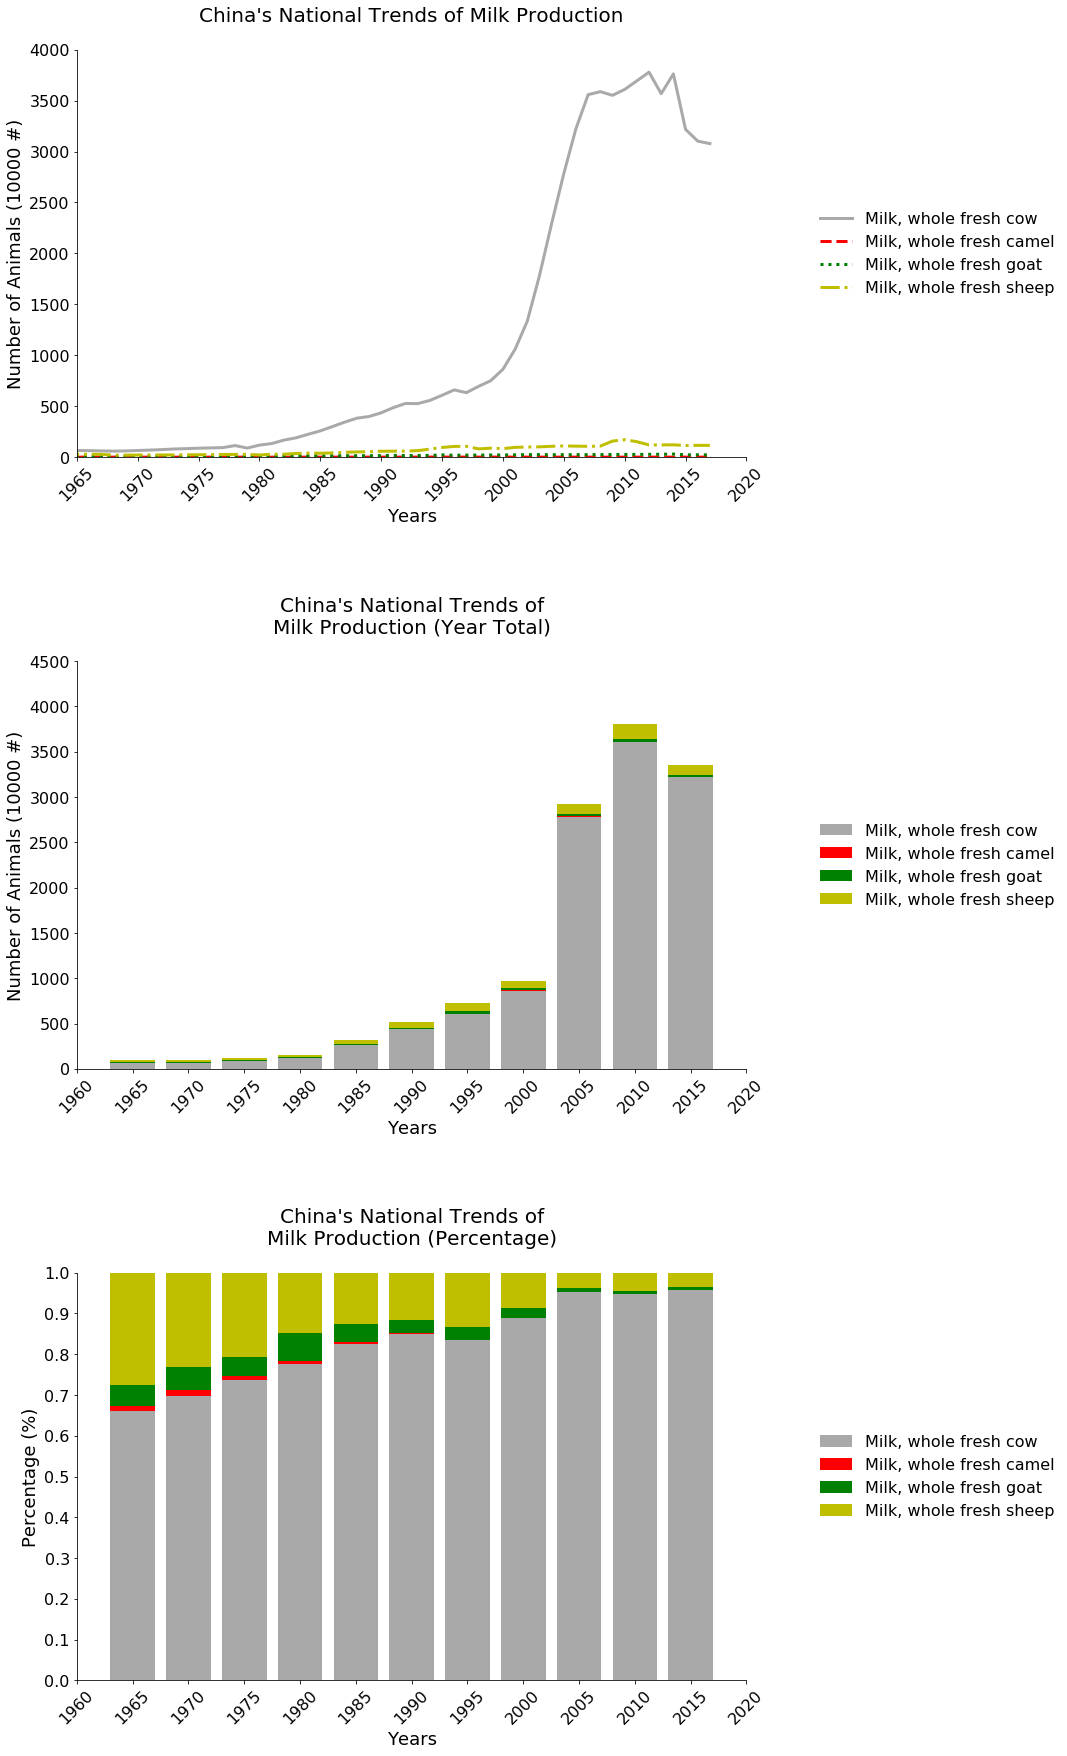

In [127]:
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          
plt.subplots_adjust(wspace =0.3, hspace =0.5)

# data frame of all birds stocks
items = milk

# data frame of each kind of birds stocks
dfs_milk_pd = {}
for n in range(0, len(items)):
    dfs_milk_pd[items[n]] = df_pd[df_pd['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# Draw Trends Line-------------------------------------------------------------------------------------

ax0 = fig.add_subplot(3,1,1)
plt.title("China's National Trends of Milk Production\n", fontsize=tit_size)

# draw lines of animal productions of livestocks
for n in range(0, len(items)):
    dfs_milk_pd[items[n]].plot.line(x='Year', 
                                      color=colors[n], 
                                      ls=linestyles[n], 
                                      lw=3, 
                                      ax=ax0)
    
ax0.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax0)

Xs = range(1965,2025,5)
setX_years(ax0, Xs)

Ys = range(0, 4500, 500)
setY_num(ax0, Ys)


# Draw Stack Bar----------------------------------------------------------------------------------------

wid = 4
years = list(range(1965,2020,5))
# ------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(3,1,2)
plt.title("China's National Trends of\nMilk Production (Year Total)\n", fontsize=tit_size)

# draw a bars
plt.bar(years, np.array(dfs_milk_pd[items[0]][dfs_milk_pd[items[0]]['Year'].isin(years)]['Value']),
        color=colors[0], width=wid)

bot=np.array(dfs_milk_pd[items[0]][dfs_milk_pd[items[0]]['Year'].isin(years)]['Value'])
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_milk_pd[items[n]][dfs_milk_pd[items[n]]['Year'].isin(years)]['Value']),
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_milk_pd[items[n]][dfs_milk_pd[items[n]]['Year'].isin(years)]['Value'])
    
year_total = bot

ax1.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax1)

Xs = range(1960,2025,5)
setX_years(ax1, Xs)

Ys = range(0, 5000, 500)
setY_num(ax1, Ys)


# --------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(3,1,3)
plt.title("China's National Trends of\nMilk Production (Percentage)\n", fontsize=tit_size)


# draw a bars
plt.bar(years, np.array(dfs_milk_pd[items[0]][dfs_milk_pd[items[0]]['Year'].isin(years)]['Value'])/year_total,
        color=colors[0], width=wid)

bot=np.array(dfs_milk_pd[items[0]][dfs_milk_pd[items[0]]['Year'].isin(years)]['Value'])/year_total
for n in range(1, len(items)):
    plt.bar(years, np.array(dfs_milk_pd[items[n]][dfs_milk_pd[items[n]]['Year'].isin(years)]['Value'])/year_total,
            bottom=bot,
            color=colors[n], width=wid)
    bot=bot + np.array(dfs_milk_pd[items[n]][dfs_milk_pd[items[n]]['Year'].isin(years)]['Value'])/year_total

ax2.legend(labels=list(items),
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

setSpi_LB(ax2)

Xs = range(1960,2025,5)
setX_years(ax2, Xs)

Ys = np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2)
setY_per(ax2, Ys)


plt.show()

## Results

Finally, we can clean our data further.

In [117]:
stocks = ['Cattle', 'Goats', 'Sheep', 'Pigs', 'Chickens', 'Ducks']
meat=['Meat, cattle', 'Meat, goat', 'Meat, sheep', 'Meat, pig', 'Meat, chicken', 'Meat, duck']
egg_milk=['Eggs, hen, in shell', 'Eggs, other bird, in shell', 'Milk, whole fresh cow']

df = df.loc[df['Item'].isin(stocks+meat+egg_milk)]
df.shape

(1539, 8)

In [119]:
df.groupby(['Element', 'Item']).count()

Domain  Area  Year  \
Element                       Item                                             
Producing Animals/Slaughtered Meat, cattle                    57    57    57   
                              Meat, chicken                   57    57    57   
                              Meat, duck                      57    57    57   
                              Meat, goat                      57    57    57   
                              Meat, pig                       57    57    57   
                              Meat, sheep                     57    57    57   
Production                    Eggs, hen, in shell             57    57    57   
                              Eggs, other bird, in shell      57    57    57   
                              Meat, cattle                    57    57    57   
                              Meat, chicken                   57    57    57   
                              Meat, duck                      57    57    57   
                              Meat, goat                      57    57    57   
                              Meat, pig                       57    57    57   
                              Meat, sheep                     57    57    57   
                              Milk, whole fresh cow           57    57    57   
Stocks                        Cattle                          57    57    57   
                              Chickens                        57    57    57   
                              Ducks                           57    57    57   
                              Goats                           57    57    57   
                              Pigs                            57    57    57   
                              Sheep                           57    57    57   
Yield/Carcass Weight          Meat, cattle                    57    57    57   
                              Meat, chicken                   57    57    57   
                              Meat, duck                      57    57    57   
                              Meat, goat                      57    57    57   
                              Meat, pig                       57    57    57   
                              Meat, sheep                     57    57    57   

                                                          Unit  Value  \
Element                       Item                                      
Producing Animals/Slaughtered Meat, cattle                  57     57   
                              Meat, chicken                 57     57   
                              Meat, duck                    57     57   
                              Meat, goat                    57     57   
                              Meat, pig                     57     57   
                              Meat, sheep                   57     57   
Production                    Eggs, hen, in shell           57     57   
                              Eggs, other bird, in shell    57     57   
                              Meat, cattle                  57     57   
                              Meat, chicken                 57     57   
                              Meat, duck                    57     57   
                              Meat, goat                    57     57   
                              Meat, pig                     57     57   
                              Meat, sheep                   57     57   
                              Milk, whole fresh cow         57     57   
Stocks                        Cattle                        57     57   
                              Chickens                      57     57   
                              Ducks                         57     57   
                              Goats                         57     57   
                              Pigs                          57     57   
                              Sheep                         57     57   
Yield/Carcass Weight          Meat, cattle                

In [120]:
df.to_csv('./data/product_livestock_cn_clean.csv', index=False)